In [ ]:
'''
Luiz Neto
Instituto de Ciências Atmosféricas - UFAL
luizsneto211@gmail.com
luiz.neto@icat.ufal.br
Last updated on April 02, 2025
'''

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
from netCDF4 import Dataset


In [ ]:
ds = xr.open_dataset ("tempbr.nc")
data_var = ds.metpy.parse_cf('air')
ds

x = data_var.lon
y = data_var.lat

data_escolhida = '2025-03-26'
data_escolhida_ds= ds.sel(time=data_escolhida)
data_escolhida_ds

<xarray.Dataset>
Dimensions:  (lon: 33, lat: 33)
Coordinates:
    time     datetime64[ns] 2025-03-26
  * lon      (lon) float32 260.0 262.5 265.0 267.5 ... 332.5 335.0 337.5 340.0
  * lat      (lat) float32 20.0 17.5 15.0 12.5 10.0 ... -52.5 -55.0 -57.5 -60.0
Data variables:
    air      (lat, lon) float32 ...
Attributes:
    CDI:            Climate Data Interface version 1.9.10 (https://mpimet.mpg...
    Conventions:    CF-1.2
    title:          Once daily NCEP geopotential height data 
    delta_time:     once daily
    supplier:       NCEP
    producer:       NCEP
    history:        27-Mar-2025 02:39:21 Subset NOAA/PSL  
    description:    Data is from NCEP initialized analysis\n(2x/day).  It con...
    platform:       Model
    References:     https://www.psl.noaa.gov/data/gridded/data.ncep.html
    dataset_title:  NCEP Global Data Assimilation System GDAS
    CDO:            Climate Data Operators version 1.9.10 (https://mpimet.mpg...

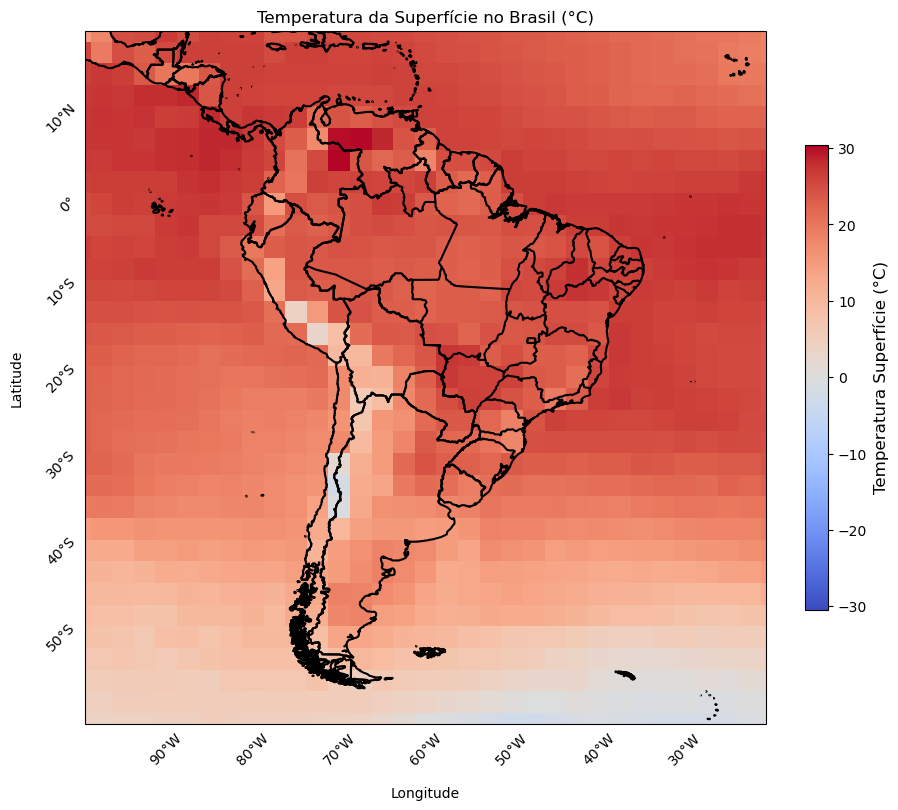

In [6]:
shapefile = 'ne_10m_admin_0_countries_bra.shp'
gdf = gpd.read_file(shapefile)

# Criar a figura em branco e dps plotar
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Plotar dados de temperatura no mapa
temp_c = data_escolhida_ds['air'] - 273.15  # Temperatura em Celsius
img = temp_c.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
plt.title('Temperatura da Superfície no Brasil (°C)', fontsize=12)
ax.set_extent([260.625, 339.375, -59.9986, 19.9997], crs=ccrs.PlateCarree())

# Plotar o shapefile do Brasil sobre a temperatura e adicionar umas coisas a mais tipo os estados
gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1.5)
states = cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='black', linewidth=1.5)

# Adicionar títulos nas laterais
ax.text(0.5, -0.1, 'Longitude', ha='center', va='center', transform=ax.transAxes)
ax.text(-0.1, 0.5, 'Latitude', ha='center', va='center', rotation='vertical', transform=ax.transAxes)

# Adicionar gridlines e rotacionar os números
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0, linestyle='--')
g1.xlabel_style = {'rotation': 45}
g1.ylabel_style = {'rotation': 45}
g1.right_labels = False
g1.top_labels = False

# Personalizando barra lateral
cbar = plt.colorbar(img, ax=ax, orientation='vertical', fraction=0.030, pad=0.05) #pad distancia entre imagem e barra lateral ##fraction comprimento
cbar.set_label('Temperatura Superfície (°C)', fontsize=12)

plt.show()
